## Car Sales Analysis

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

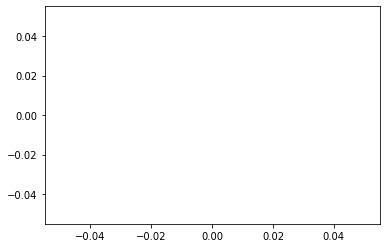

In [3]:
plt.plot();

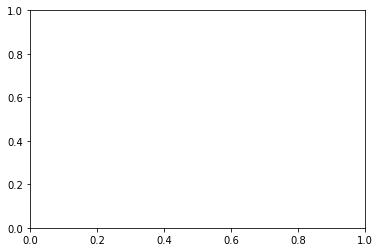

In [4]:
#method 1
fig = plt.figure() #creates a figure
ax = fig.add_subplot() #adds some axes
plt.show()

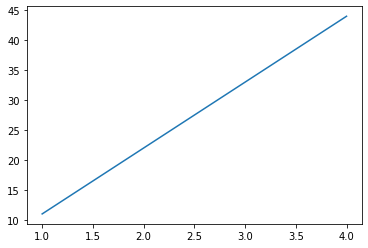

In [6]:
x= [1, 2, 3, 4]
y= [11, 22, 33, 44]
plt.plot(x,y);

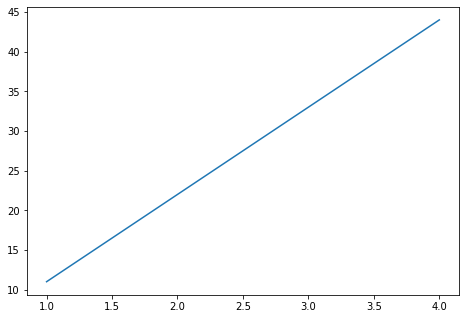

In [7]:
#method 2 ()
fig = plt.figure() #creates a figure
ax = fig.add_axes([1, 1, 1, 1]) #adds some axes

ax.plot(x, y) #add some data
plt.show()

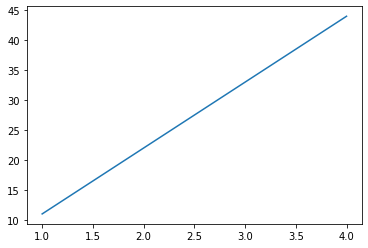

In [8]:
#method 3 (recommended)
fig, ax = plt.subplots()
ax.plot(x,y);

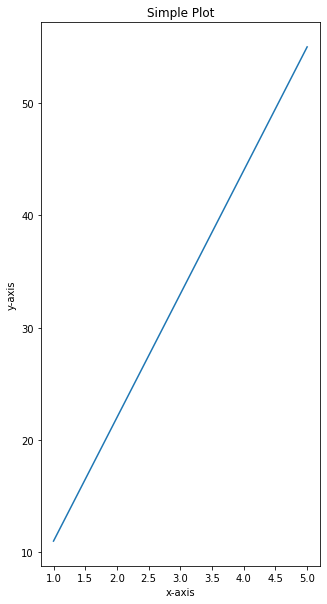

In [9]:
# step 0.  import matplotlib and get it ready for plotting in jupyter
%matplotlib inline 
import matplotlib.pyplot as plt

# step 1.  Prepare data
x = [1, 2, 3, 4, 5]
y = [11, 22, 33, 44, 55]

# step 2. Setup plot
fig, ax = plt.subplots(figsize=(5, 10)) # (width, height)

# step 3. Plot data
ax.plot(x, y)

# step 4. Customize plot
ax.set(title="Simple Plot", xlabel = "x-axis", ylabel = "y-axis")

# step 5. save & show (you save the whole figure)
fig.savefig("images/sample-plot.png")

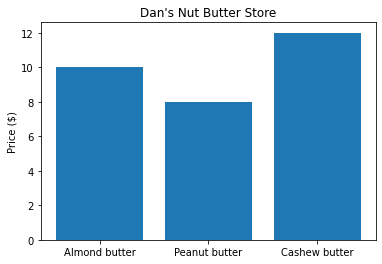

In [10]:
# Make a plot from dictionary
nut_butter_prices = {"Almond butter": 10,
                    "Peanut butter": 8,
                    "Cashew butter": 12}

fig, ax = plt.subplots()
ax.bar(nut_butter_prices.keys(), nut_butter_prices.values());

ax.set(title = "Dan's Nut Butter Store", ylabel = "Price ($)" );


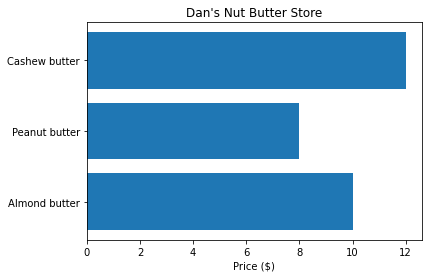

In [11]:
# Horizontal Bar (barh)
fig, ax = plt.subplots()
ax.barh(list(nut_butter_prices.keys()), list(nut_butter_prices.values()));

ax.set(title = "Dan's Nut Butter Store", xlabel = "Price ($)" );


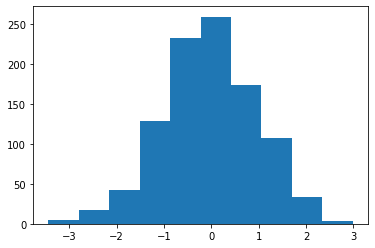

In [12]:
# Make some data for histogram

x = np.random.randn(1000)
fig, ax = plt.subplots()
ax.hist(x);

## Two options for subplots

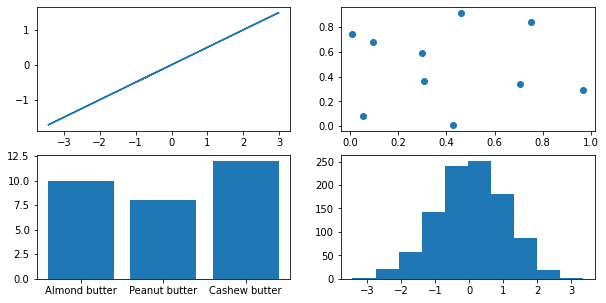

In [13]:
# subplot option 1

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(10,5))


# Plot to each different axis

ax1.plot(x, x/2)
ax2.scatter(np.random.random(10), np.random.random(10));
ax3.bar(nut_butter_prices.keys(), nut_butter_prices.values());
ax4.hist(np.random.randn(1000));

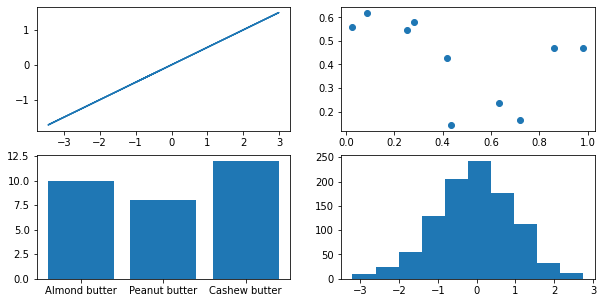

In [14]:
# subplots option 2
fig, ax = plt.subplots(nrows=2, ncols=2, figsize =(10,5))
ax[0, 0].plot(x, x/2)
ax[0, 1].scatter(np.random.random(10), np.random.random(10));
ax[1, 0].bar(nut_butter_prices.keys(), nut_butter_prices.values());
ax[1, 1].hist(np.random.randn(1000));

## Plotting from pandas DataFrames

In [56]:
# Make a dataFrame
car_sales = pd.read_csv("data/car-sales.csv")
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


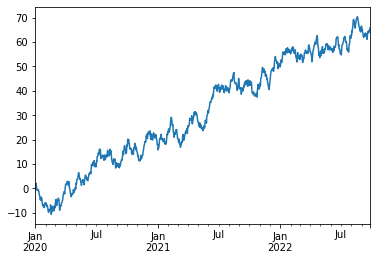

In [49]:
# plotting from a series
ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2020", periods=1000))
ts = ts.cumsum()
ts.plot();

In [50]:

car_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Make           10 non-null     object
 1   Colour         10 non-null     object
 2   Odometer (KM)  10 non-null     int64 
 3   Doors          10 non-null     int64 
 4   Price          10 non-null     object
dtypes: int64(2), object(3)
memory usage: 528.0+ bytes


In [58]:
#removing [\$\,\.] in Price
car_sales["Price"] = car_sales["Price"].str.replace('[\$\,\.]', '')

C:\Users\ifeanyi\AppData\Local\Temp\ipykernel_10452\2440585388.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  car_sales["Price"] = car_sales["Price"].str.replace('[\$\,\.]', '')


In [59]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,400000
1,Honda,Red,87899,4,500000
2,Toyota,Blue,32549,3,700000
3,BMW,Black,11179,5,2200000
4,Nissan,White,213095,4,350000
5,Toyota,Green,99213,4,450000
6,Honda,Blue,45698,4,750000
7,Honda,Blue,54738,4,700000
8,Toyota,White,60000,4,625000
9,Nissan,White,31600,4,970000


In [60]:
# removing the additional zeros
car_sales["Price"] = car_sales["Price"].str[:-2]

In [61]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,4000
1,Honda,Red,87899,4,5000
2,Toyota,Blue,32549,3,7000
3,BMW,Black,11179,5,22000
4,Nissan,White,213095,4,3500
5,Toyota,Green,99213,4,4500
6,Honda,Blue,45698,4,7500
7,Honda,Blue,54738,4,7000
8,Toyota,White,60000,4,6250
9,Nissan,White,31600,4,9700


In [62]:
# inserting sale date column
car_sales["Sale Date"] = pd.date_range("1/1/2020", periods = len(car_sales))
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Sale Date
0,Toyota,White,150043,4,4000,2020-01-01
1,Honda,Red,87899,4,5000,2020-01-02
2,Toyota,Blue,32549,3,7000,2020-01-03
3,BMW,Black,11179,5,22000,2020-01-04
4,Nissan,White,213095,4,3500,2020-01-05
5,Toyota,Green,99213,4,4500,2020-01-06
6,Honda,Blue,45698,4,7500,2020-01-07
7,Honda,Blue,54738,4,7000,2020-01-08
8,Toyota,White,60000,4,6250,2020-01-09
9,Nissan,White,31600,4,9700,2020-01-10


In [63]:
# inserting total sales column 
car_sales["Total Sales"] = car_sales["Price"].astype(int).cumsum()
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Sale Date,Total Sales
0,Toyota,White,150043,4,4000,2020-01-01,4000
1,Honda,Red,87899,4,5000,2020-01-02,9000
2,Toyota,Blue,32549,3,7000,2020-01-03,16000
3,BMW,Black,11179,5,22000,2020-01-04,38000
4,Nissan,White,213095,4,3500,2020-01-05,41500
5,Toyota,Green,99213,4,4500,2020-01-06,46000
6,Honda,Blue,45698,4,7500,2020-01-07,53500
7,Honda,Blue,54738,4,7000,2020-01-08,60500
8,Toyota,White,60000,4,6250,2020-01-09,66750
9,Nissan,White,31600,4,9700,2020-01-10,76450


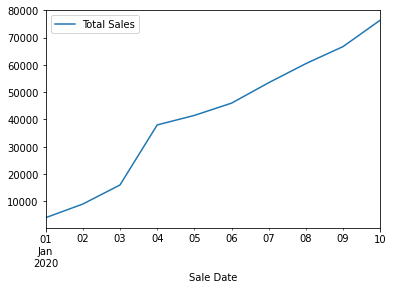

In [65]:
#  plotting the total sales
car_sales.plot( x= "Sale Date", y = "Total Sales");

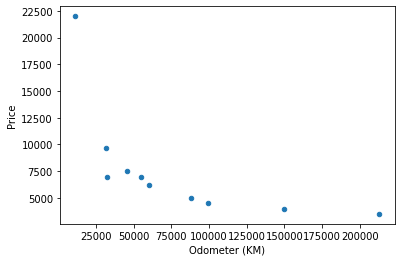

In [67]:
# Reassign price column to int before plotting  
car_sales["Price"] = car_sales["Price"].astype(int)

#plot scatter plot with price column as numeric
car_sales.plot(x = "Odometer (KM)", y = "Price", kind = "scatter");

In [68]:
# How about a bar graph

x= np.random.rand(10, 4)
x

# Turn it into a dataframe

df = pd.DataFrame(x, columns=['a', 'b', 'c', 'd'])
df

,a,b,c,d
0,0.291873,0.202022,0.435121,0.537902
1,0.567985,0.694323,0.880571,0.884703
2,0.097170,0.806681,0.633886,0.610838
3,0.221775,0.682572,0.796591,0.783423
4,0.237876,0.211786,0.493312,0.497164
5,0.720694,0.200388,0.007540,0.494688
6,0.116513,0.528042,0.417376,0.095057
7,0.536575,0.139753,0.792292,0.049624
8,0.562817,0.538040,0.714891,0.757270
9,0.619681,0.199821,0.510297,0.135565


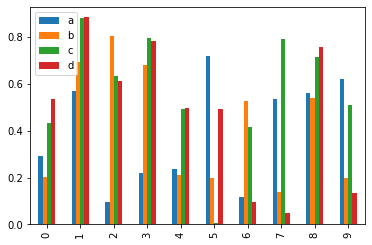

In [69]:
df.plot.bar();

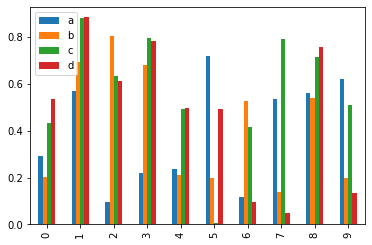

In [70]:
df.plot(kind = "bar");

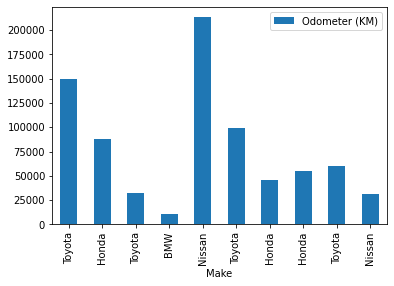

In [71]:
car_sales.plot(x="Make", y="Odometer (KM)", kind= "bar");

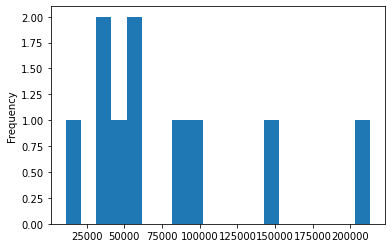

In [73]:
# adjusting the bins
car_sales["Odometer (KM)"].plot(kind= "hist", bins=20);

In [74]:
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price,Sale Date,Total Sales
0,Toyota,White,150043,4,4000,2020-01-01,4000
1,Honda,Red,87899,4,5000,2020-01-02,9000
2,Toyota,Blue,32549,3,7000,2020-01-03,16000
3,BMW,Black,11179,5,22000,2020-01-04,38000
4,Nissan,White,213095,4,3500,2020-01-05,41500


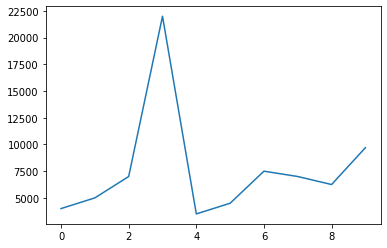

In [75]:
car_sales['Price'].plot();

In [76]:
plt.style.use('seaborn-whitegrid')

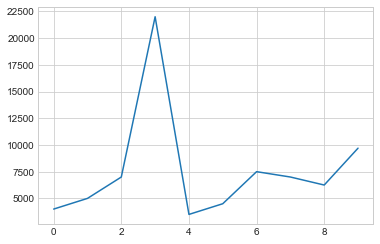

In [77]:
car_sales["Price"].plot();

In [78]:
# seaborn intro
plt.style.use("seaborn")

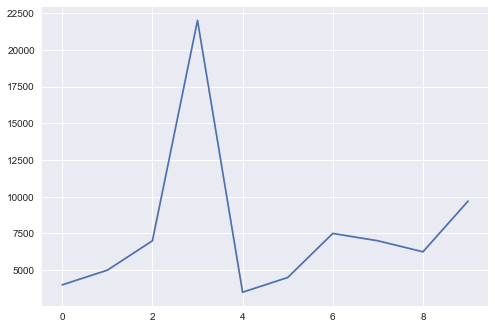

In [79]:
car_sales["Price"].plot();

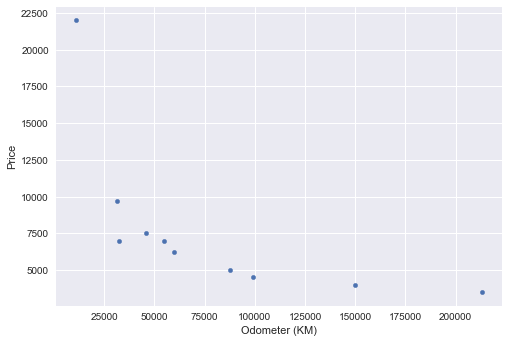

In [80]:
car_sales.plot(x = "Odometer (KM)", y = "Price", kind = 'scatter');

In [81]:
plt.style.use("ggplot")

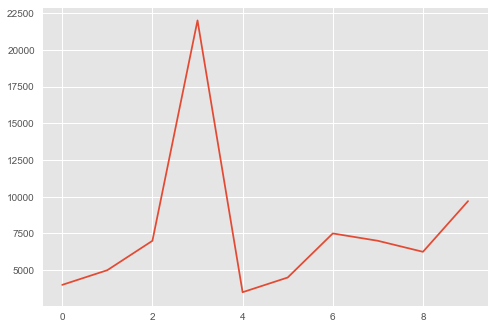

In [82]:
car_sales["Price"].plot();